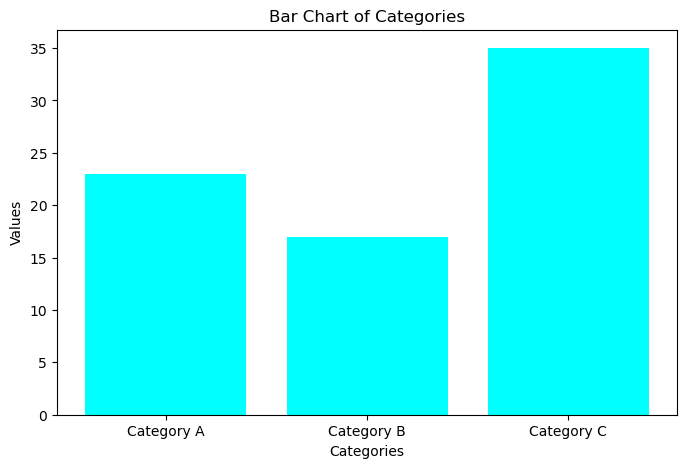

In [1]:
# Pertemuan 13

# Exercise 1: Basic Plotting with Matplotlib
import matplotlib.pyplot as plt

# Data for plotting
categories = ['Category A', 'Category B', 'Category C']
values = [23, 17, 35]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='cyan')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart of Categories')
plt.show()

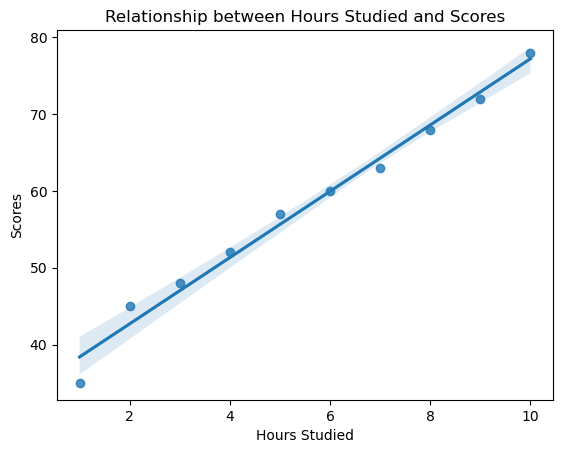

In [3]:
# Exercise 2: Seaborn for Relationship Visualization
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'Hours Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Scores': [35, 45, 48, 52, 57, 60, 63, 68, 72, 78]
}
df = pd.DataFrame(data)

# Plot
sns.regplot(x='Hours Studied', y='Scores', data=df)
plt.title('Relationship between Hours Studied and Scores')
plt.show()

In [ ]:
# Practice Tasks¶
    # Use Matplotlib to create a multi-bar chart to compare data across groups.
    # Generate scatter plots with Seaborn to explore relationships between variables in a dataset.
    # Customize plot layouts and color schemes.


In [11]:
# ================================
# 1. Load dataset
# ================================
df = pd.read_csv("Titanic-Dataset.csv")

# ================================
# 2. Tangani missing values
# ================================
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'].fillna('unknown', inplace=True)

# ================================
# 3. Standarisasi kategorikal
# ================================
for col in ['Sex', 'Embarked']:
    df[col] = df[col].astype(str).str.lower()

# Hapus duplikat
df.drop_duplicates(inplace=True)



/tmp/ipykernel_41852/567184924.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_41852/567184924.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

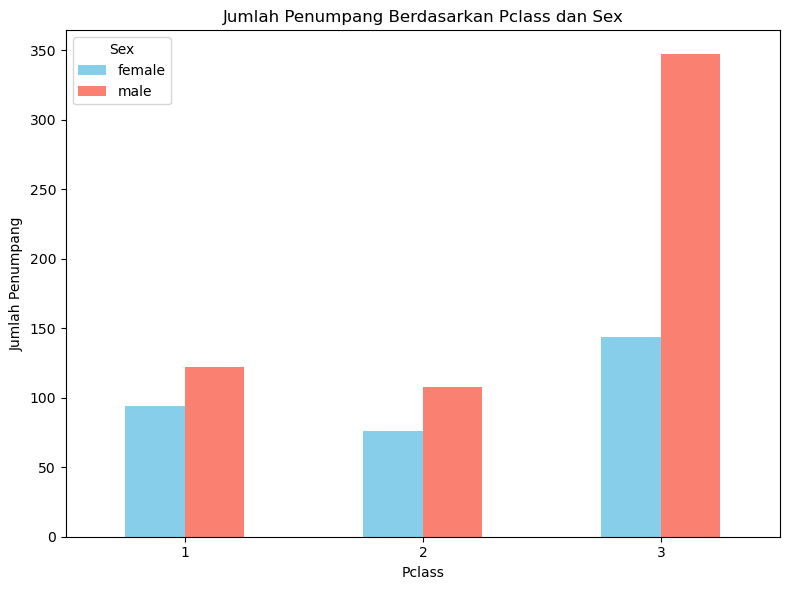

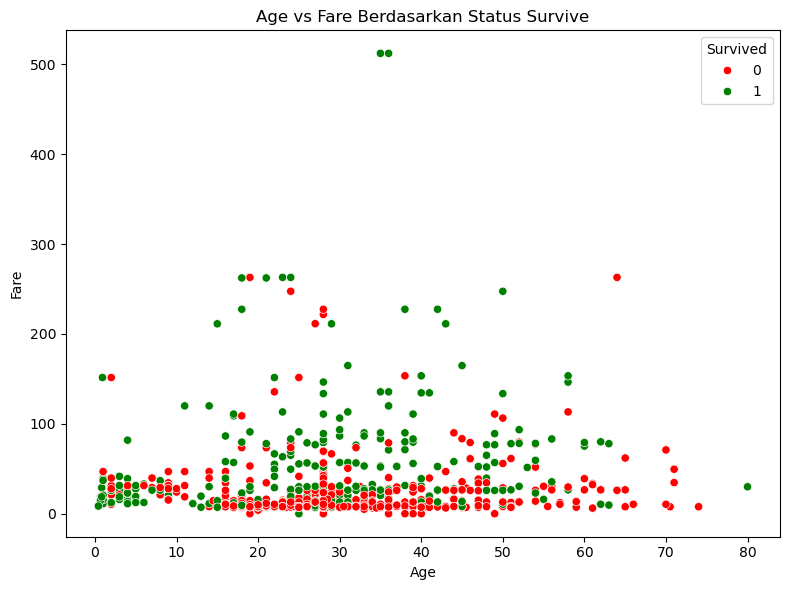

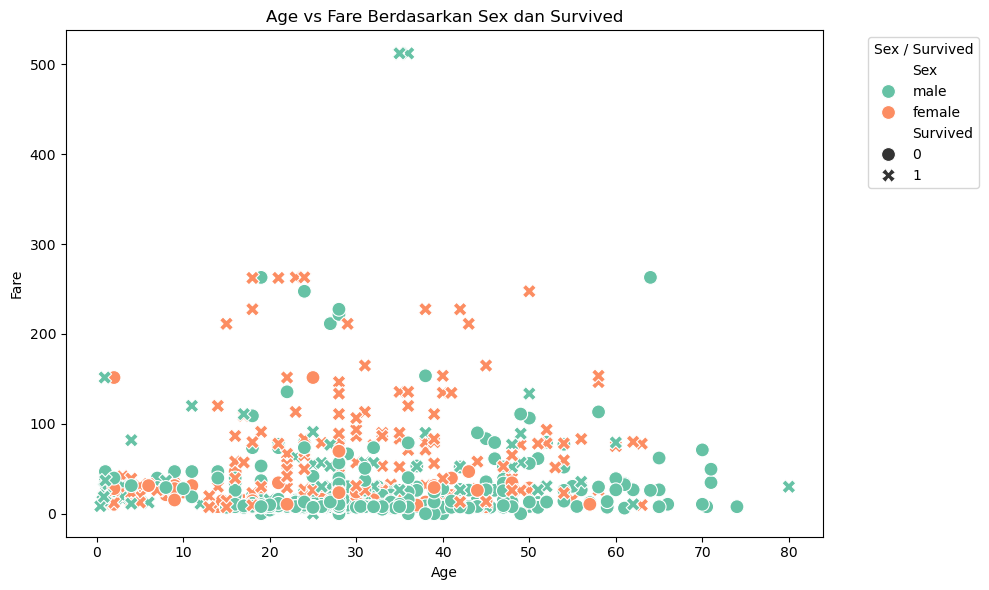

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# ================================
# 5. Visualisasi
# ================================

# --- a. Multi-bar chart: Pclass x Sex ---
pclass_sex_counts = df.groupby(['Pclass', 'Sex'])['PassengerId'].count().unstack()
pclass_sex_counts.plot(kind='bar', figsize=(8,6), color=['skyblue','salmon'])
plt.title("Jumlah Penumpang Berdasarkan Pclass dan Sex")
plt.xlabel("Pclass")
plt.ylabel("Jumlah Penumpang")
plt.xticks(rotation=0)
plt.legend(title="Sex")
plt.tight_layout()
plt.show()

# --- b. Scatter plot: Age vs Fare vs Survived (data asli) ---
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', palette={0:'red', 1:'green'})
plt.title("Age vs Fare Berdasarkan Status Survive")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived")
plt.tight_layout()
plt.show()

# --- c. Scatter plot: Age vs Fare, marker berbeda berdasarkan Sex & Survived ---
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Sex', style='Survived', palette='Set2', s=100)
plt.title("Age vs Fare Berdasarkan Sex dan Survived")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Sex / Survived", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


In [21]:
# HomeWork
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("adult.csv")

# 2. Tangani missing values
# Ganti "?" dengan NaN
df = df.replace("?", pd.NA)

# Isi missing value kolom kategorikal dengan 'unknown'
missing_cat_cols = ['occupation', 'workclass', 'native.country']
for col in missing_cat_cols:
    df[col] = df[col].fillna('unknown')

# 3. Tangani outlier (IQR method)
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

# Terapkan untuk kolom numerik
for col in ['age', 'hours.per.week']:
    df = remove_outliers_iqr(df, col)

print("Data siap divisualisasikan!")
print(df[['age', 'hours.per.week', 'income']].head())

Data siap divisualisasikan!
   age  hours.per.week income
2   66              40  <=50K
3   54              40  <=50K
4   41              40  <=50K
5   34              45  <=50K
6   38              40  <=50K


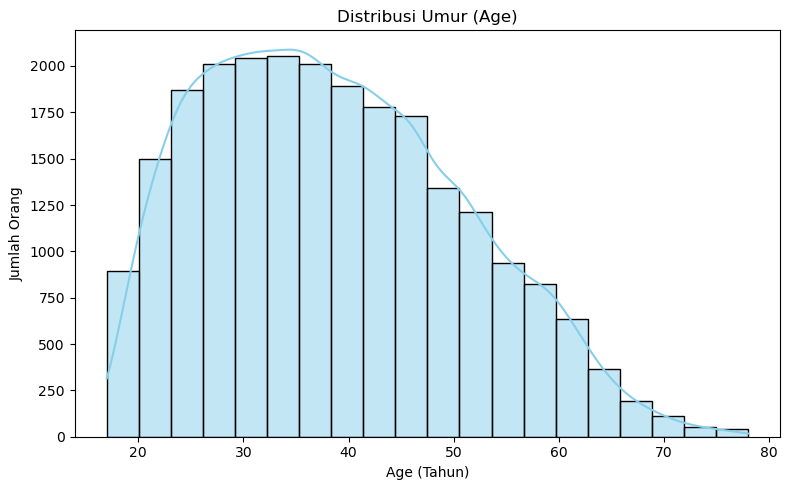

In [22]:
# --- a. Histogram: Distribusi Age ---
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title("Distribusi Umur (Age)")
plt.xlabel("Age (Tahun)")
plt.ylabel("Jumlah Orang")
plt.tight_layout()
plt.show()

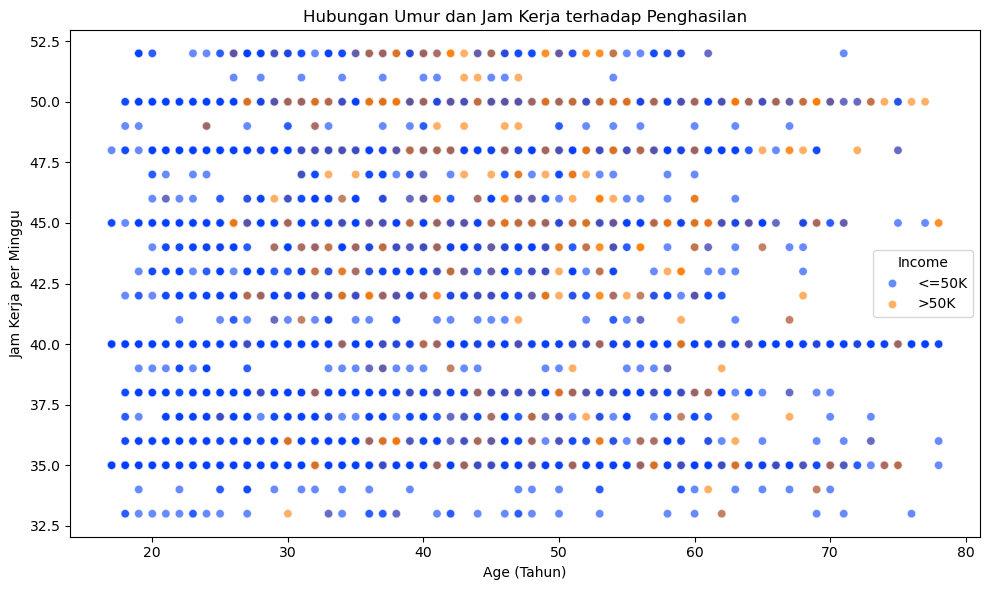

In [23]:
# --- b. Scatter Plot: Age vs Hours per Week (dengan Income) ---
plt.figure(figsize=(10,6))

# Kita menggunakan kolom 'income' asli yang berisi '<=50K' atau '>50K'
sns.scatterplot(
    data=df,
    x='age',
    y='hours.per.week',
    hue='income',
    palette='bright', # Menggunakan palet warna cerah otomatis
    alpha=0.6
)

plt.title("Hubungan Umur dan Jam Kerja terhadap Penghasilan")
plt.xlabel("Age (Tahun)")
plt.ylabel("Jam Kerja per Minggu")
plt.legend(title="Income")
plt.tight_layout()
plt.show()